# PART I - PREPARING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Cansu/Documents/_My Python Repository/DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


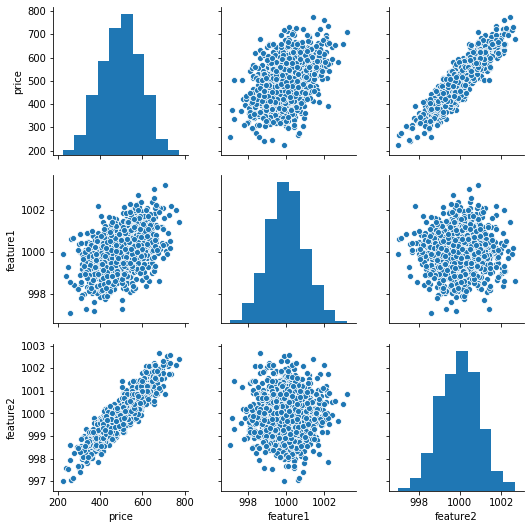

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y =df['price'].values

In [7]:
X = df[['feature1' , 'feature2']].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.3,
                                                     random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
X_train = scaler.transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.max()

1.0

In [18]:
X_train.min()

0.0

In [19]:
X_test.max()

1.0186515935232023

# PART II - Creating and Training the Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
## create a simple sequential layer than add dense layers

In [22]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

Another way:
model = Sequential([Dense(4, activation = 'relu'), 
                    Dense(2, activation = 'relu'),
                    Dense(1)])

In [23]:
model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

Choosing and optimizer and loss

1- For a MULTI-CLASS CLASSIFICATION problem
mode.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acurracy'])
             
2- For a BINARY CLASSIFICATION problem
mode.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acurracy'])
             
3- For a MEAN SQUARED ERROR REGRESSION problem
mode.compile(optimizer='rmsprop',
             loss='mse')

In [24]:
model.fit(x= X_train,
          y= y_train,
          epochs= 250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 256775.2302
Epoch 2/250
700/700 [==============================] - 0s 37us/sample - loss: 256716.3266
Epoch 3/250
700/700 [==============================] - 0s 39us/sample - loss: 256648.0888
Epoch 4/250
700/700 [==============================] - 0s 43us/sample - loss: 256555.1274
Epoch 5/250
700/700 [==============================] - 0s 40us/sample - loss: 256451.3359
Epoch 6/250
700/700 [==============================] - 0s 36us/sample - loss: 256352.2313
Epoch 7/250
700/700 [==============================] - 0s 41us/sample - loss: 256257.9640
Epoch 8/250
700/700 [==============================] - 0s 41us/sample - loss: 256164.5580
Epoch 9/250
700/700 [==============================] - 0s 39us/sample - loss: 256069.9427
Epoch 10/250
700/700 [==============================] - 0s 36us/sample - loss: 255973.9150
Epoch 11/250
700/700 [==============================] - 0s 40us/sample - loss: 

700/700 [==============================] - 0s 36us/sample - loss: 213482.3249
Epoch 91/250
700/700 [==============================] - 0s 41us/sample - loss: 212272.7531
Epoch 92/250
700/700 [==============================] - 0s 31us/sample - loss: 211044.5016
Epoch 93/250
700/700 [==============================] - 0s 41us/sample - loss: 209794.1208
Epoch 94/250
700/700 [==============================] - 0s 36us/sample - loss: 208525.3138
Epoch 95/250
700/700 [==============================] - 0s 37us/sample - loss: 207235.3057
Epoch 96/250
700/700 [==============================] - 0s 39us/sample - loss: 205925.1948
Epoch 97/250
700/700 [==============================] - 0s 31us/sample - loss: 204587.9497
Epoch 98/250
700/700 [==============================] - 0s 39us/sample - loss: 203229.1854
Epoch 99/250
700/700 [==============================] - 0s 36us/sample - loss: 201855.8570
Epoch 100/250
700/700 [==============================] - 0s 47us/sample - loss: 200466.0857
Epoch 101/2

700/700 [==============================] - 0s 33us/sample - loss: 47008.0380
Epoch 180/250
700/700 [==============================] - 0s 37us/sample - loss: 45070.3563
Epoch 181/250
700/700 [==============================] - 0s 40us/sample - loss: 43166.4042
Epoch 182/250
700/700 [==============================] - 0s 36us/sample - loss: 41278.5024
Epoch 183/250
700/700 [==============================] - 0s 36us/sample - loss: 39431.6162
Epoch 184/250
700/700 [==============================] - 0s 34us/sample - loss: 37598.9765
Epoch 185/250
700/700 [==============================] - 0s 36us/sample - loss: 35801.1639
Epoch 186/250
700/700 [==============================] - 0s 41us/sample - loss: 34027.4855
Epoch 187/250
700/700 [==============================] - 0s 34us/sample - loss: 32279.1192
Epoch 188/250
700/700 [==============================] - 0s 39us/sample - loss: 30570.3508
Epoch 189/250
700/700 [==============================] - 0s 43us/sample - loss: 28914.0774
Epoch 190/250

In [25]:
model.history.history

{'loss': [256775.23017857142,
  256716.32660714287,
  256648.08875,
  256555.12741071428,
  256451.33589285714,
  256352.2313392857,
  256257.96401785716,
  256164.5580357143,
  256069.94267857142,
  255973.915,
  255874.43142857144,
  255770.13178571427,
  255661.28982142857,
  255547.55044642856,
  255428.14089285713,
  255302.89053571428,
  255172.23517857143,
  255035.79589285713,
  254894.12732142856,
  254745.99598214286,
  254591.97125,
  254431.25285714286,
  254263.91901785714,
  254090.77723214286,
  253910.75410714286,
  253724.86169642856,
  253530.79776785715,
  253329.32607142857,
  253121.1324107143,
  252906.37910714286,
  252683.97098214287,
  252453.6763392857,
  252209.14446428572,
  251953.10875,
  251684.99910714285,
  251405.76910714287,
  251116.3563392857,
  250815.30125,
  250500.3794642857,
  250171.901875,
  249833.7742857143,
  249481.64017857143,
  249114.63303571427,
  248735.19517857142,
  248341.59241071428,
  247934.76910714287,
  247515.58660714285,
  

In [26]:
loss_df = pd.DataFrame(model.history.history['loss'])

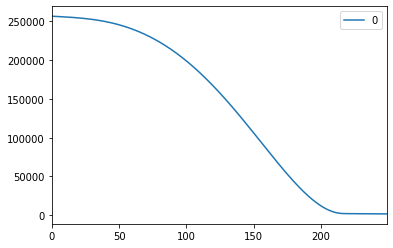

In [27]:
loss_df.plot()

# PART III - Model Evaluation

In [28]:
model.evaluate(X_test, y_test, verbose = 0)

1518.3252522786458

In [29]:
model.evaluate(X_train, y_train, verbose = 0)

1535.7806501116072

In [30]:
test_predictictions = model.predict(X_test)

In [31]:
#test_predictictions

In [32]:
test_predictictions = pd.Series(test_predictictions.reshape(300,))

In [33]:
test_predictictions

0      444.227264
1      578.185242
2      564.697571
3      533.472656
4      395.203674
          ...    
295    508.902679
296    470.488373
297    572.527954
298    463.272491
299    437.972748
Length: 300, dtype: float32

In [34]:
pred_df = pd.DataFrame(y_test, columns= ['Test True Y'])

In [35]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [36]:
pred_df = pd.concat([pred_df, test_predictictions], axis=1)

In [37]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [38]:
pred_df

,Test True Y,Model Predictions
0,402.296319,444.227264
1,624.156198,578.185242
2,582.455066,564.697571
3,578.588606,533.472656
4,371.224104,395.203674
...,...,...
295,525.704657,508.902679
296,502.909473,470.488373
297,612.727910,572.527954
298,417.569725,463.272491


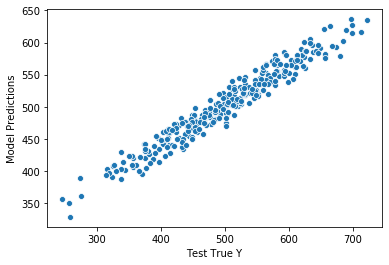

In [39]:
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data = pred_df)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

30.806180190500847

In [42]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

1518.3252507336674

In [43]:
model.evaluate(X_test, y_test, verbose = 0)**.5

38.965693273425096

In [44]:
# choose new gemstone 

In [45]:
new_gem = [[998,1000]]

In [46]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [47]:
model.predict(new_gem)

array([[486737.72]], dtype=float32)

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save('my_gem_model.h5')

In [50]:
later_model = load_model('my_gem_model.h5')

In [51]:
later_model.predict(new_gem)

array([[486737.72]], dtype=float32)